#### Import data

In [16]:
import os
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

os.chdir("E:/code/7.MachineLearningOfficial/data")
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### preprocessing
- no need to do preprocessing

#### EDA: how data is distributed in each column

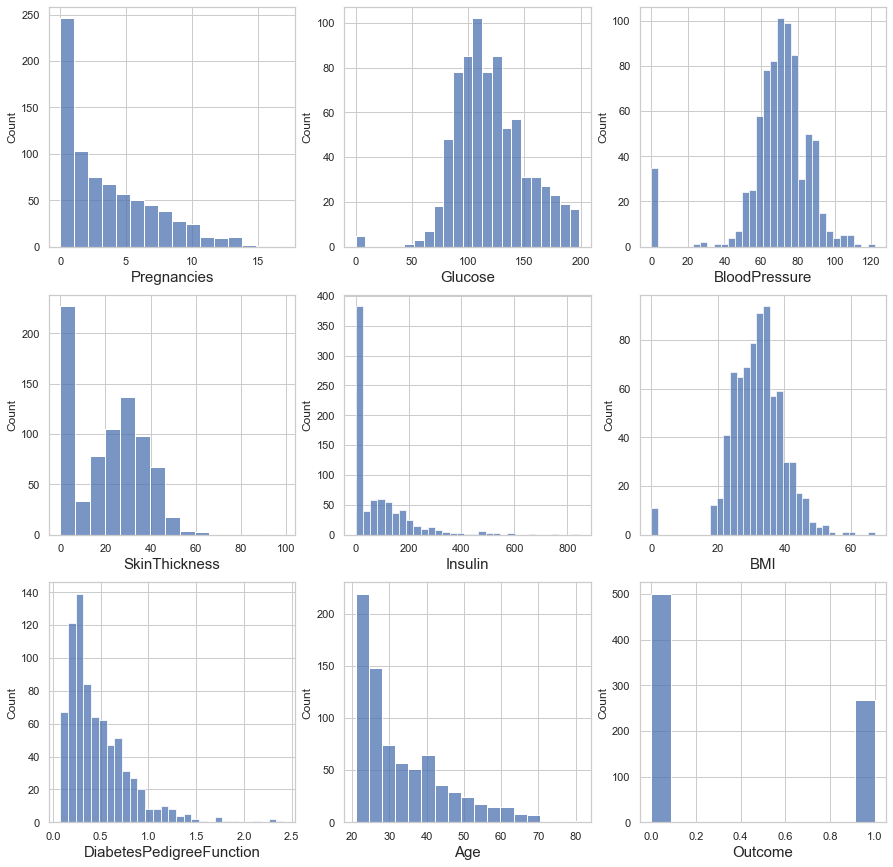

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(df[column])
        #sns.distplot(df[column])         # going to depricate
        plt.xlabel(column,fontsize=15)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

#### replacing zero values with mean of that column

In [20]:
df["Glucose"] = df["Glucose"].replace(0, df.Glucose.mean())
df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].mean())
df["BMI"] = df["BMI"].replace(0, df['BMI'].mean())

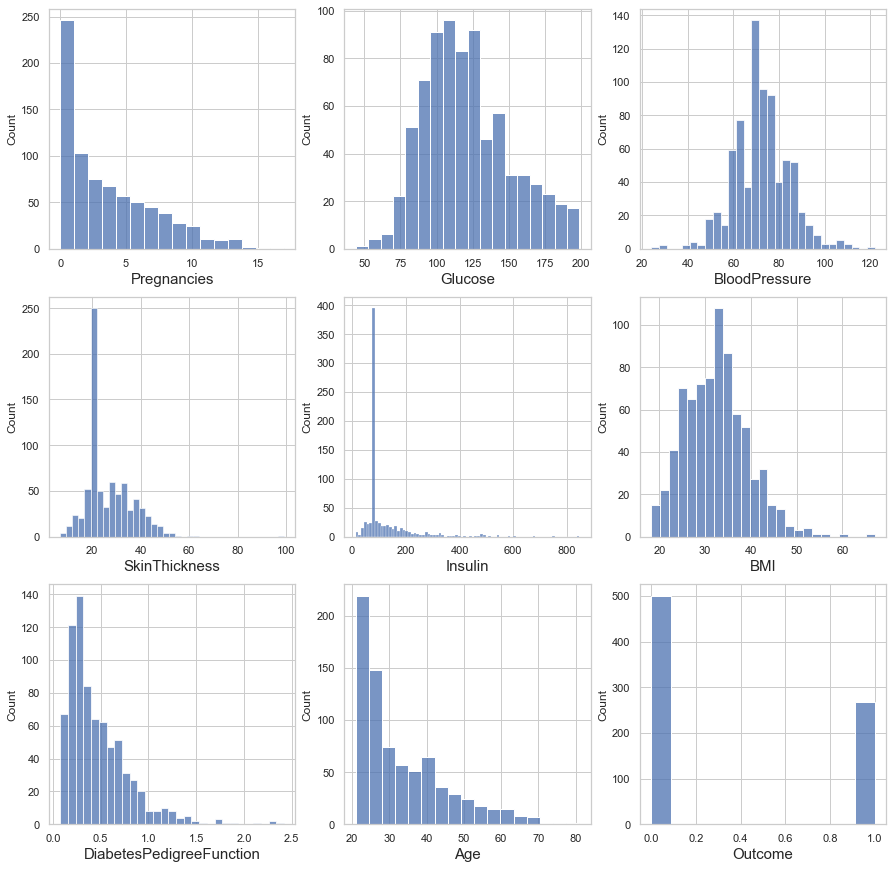

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(df[column])
        #sns.distplot(df[column])         # going to depricate
        plt.xlabel(column,fontsize=15)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

Now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns. Let's deal with them.

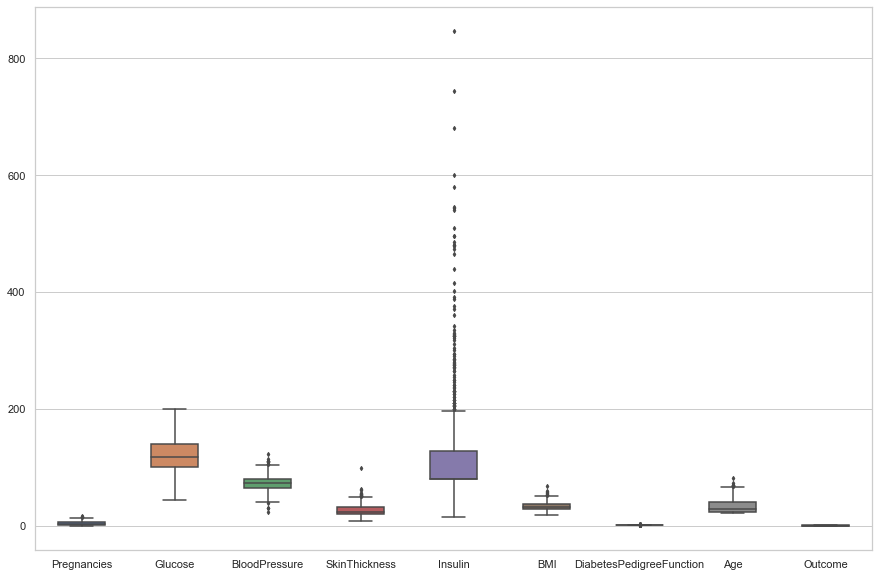

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)
plt.show()

In [23]:
# we are removing the top 2% df from the Pregnancies column
q = df['Pregnancies'].quantile(0.98)
df_cleaned = df[df['Pregnancies']<q]

# we are removing the top 1% df from the BMI column
q = df_cleaned['BMI'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['BMI']<q]

# we are removing the top 1% df from the SkinThickness column
q = df_cleaned['SkinThickness'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['SkinThickness']<q]

# we are removing the top 5% df from the Insulin column
q = df_cleaned['Insulin'].quantile(0.95)
df_cleaned  = df_cleaned[df_cleaned['Insulin']<q]

# we are removing the top 1% df from the DiabetesPedigreeFunction column
q = df_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['DiabetesPedigreeFunction']<q]

# we are removing the top 1% df from the Age column
q = df_cleaned['Age'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['Age']<q]

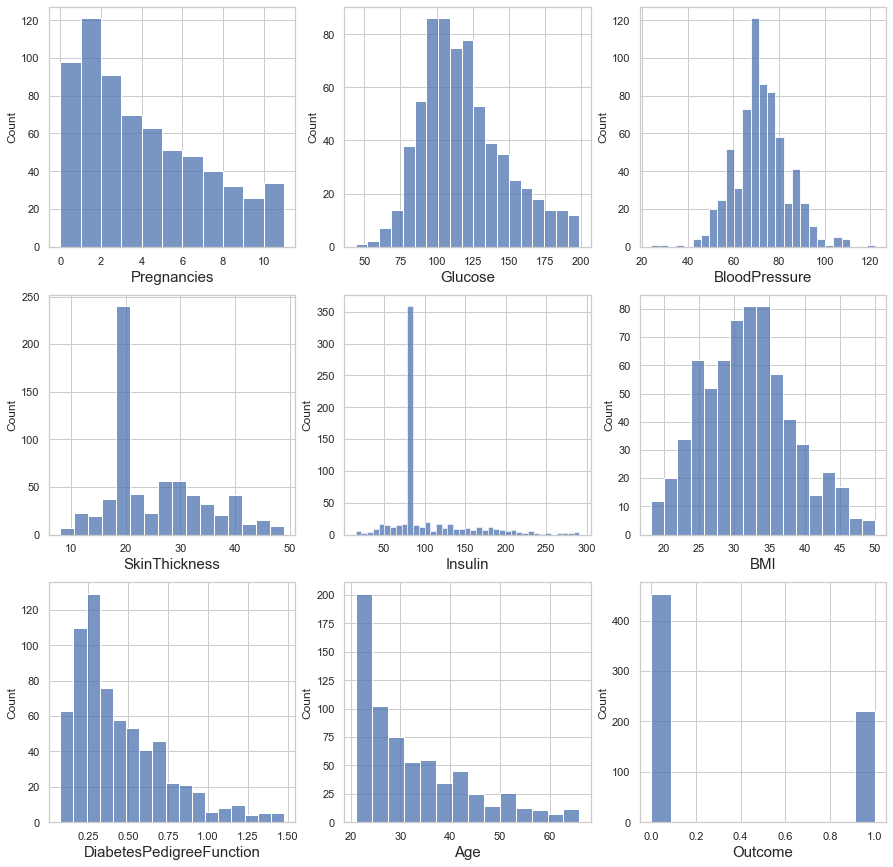

In [24]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in df_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(df_cleaned[column])
        #sns.distplot(df_cleaned[column])
        plt.xlabel(column,fontsize=15)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

In [25]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

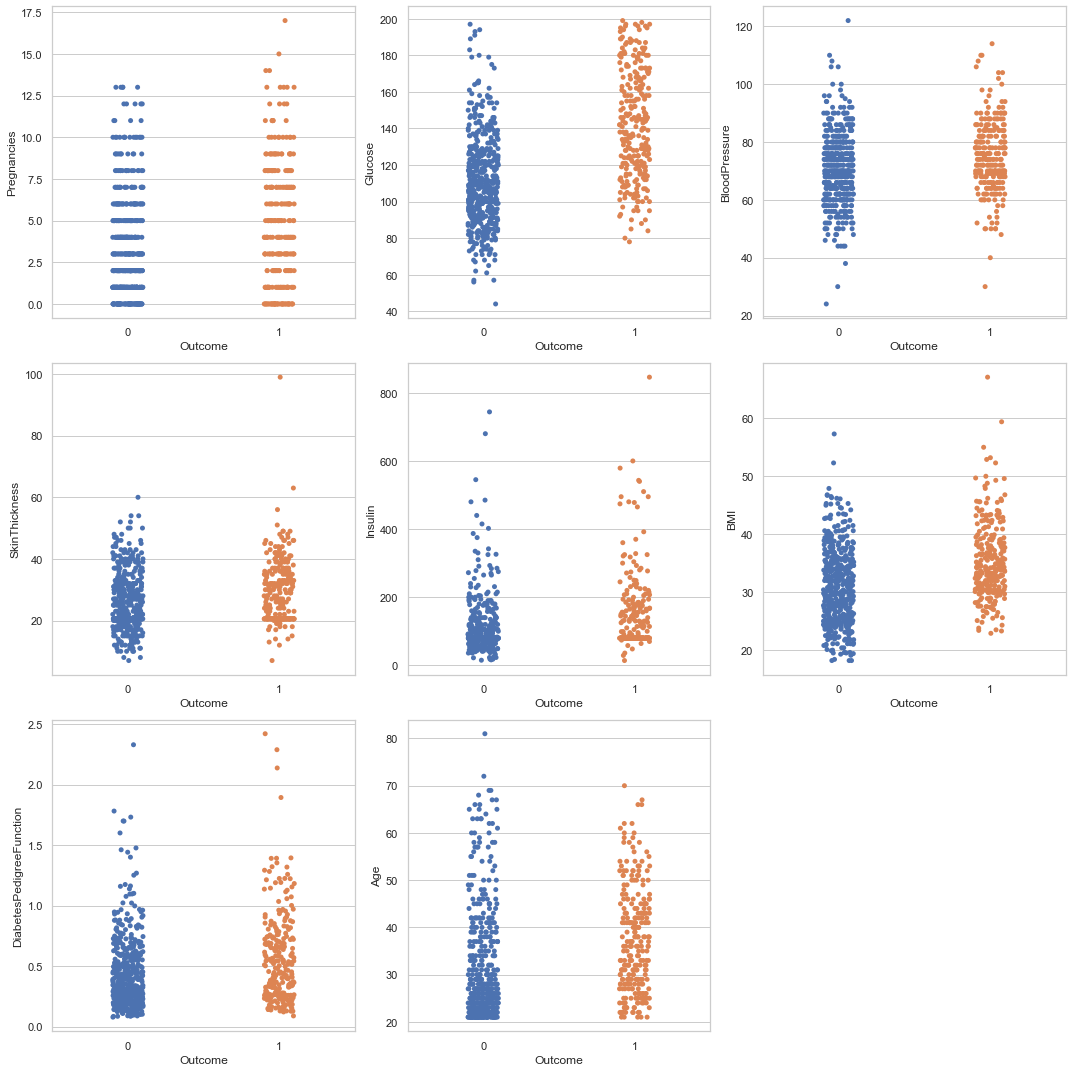

In [26]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()
plt.show()

Great!! Let's proceed by checking multicollinearity in the dependent variables. Before that, we should scale our data. Let's use the standard scaler for that.

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample `x` is calculated as:

    z = (x - u) / s

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

In [28]:
X_scaled[:10]

array([[ 0.63994726,  0.86527574, -0.0210444 ,  0.87205698, -0.41776815,
         0.16725546,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286,  0.2486783 , -0.41776815,
        -0.85153454, -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, -0.6306536 , -0.41776815,
        -1.33182125,  0.60439732, -0.10558415],
       [-0.84488505, -1.07448042, -0.51658286, -0.37470037, -0.26510678,
        -0.6332224 , -0.92076261, -1.04154944],
       [-1.14185152,  0.50362629, -2.66391618,  0.87205698,  0.5304233 ,
         1.54989902,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.1867954 ,  0.14413508, -0.6306536 , -0.41776815,
        -0.99707597, -0.81807858, -0.27575966],
       [-0.25095213, -1.43612988, -1.83801875,  0.56036764, -0.32960921,
        -0.21115225, -0.676133  , -0.61611067],
       [ 1.82781311, -0.21967262, -0.260103  , -0.6306536 , -0.41776815,
         0.41467589, -1.02042653, -0.36084741],
       [-0.54791859,  2.47625968

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [30]:
X = X.values
y = y.values

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=46)

In [32]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_test_pred = log_model.predict(X_test)
y_test_pred[:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [34]:
y_test[:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test,y_test_pred)

0.7662337662337663

In [36]:
con_matrix = confusion_matrix(y_test, y_test_pred)
con_matrix

array([[128,  23],
       [ 31,  49]], dtype=int64)

#### tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

In [37]:
tn = con_matrix[0][0]
fp = con_matrix[0][1]
fn = con_matrix[1][0]
tp = con_matrix[1][1]

In [38]:
(128+49)/(128+23+31+49)

0.7662337662337663

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       151
           1       0.68      0.61      0.64        80

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



In [40]:
y_score = log_model.predict_proba(X_test)[:,1]
y_score[:10]

array([0.40456666, 0.05111632, 0.44766012, 0.24160368, 0.41784051,
       0.59783672, 0.53850988, 0.75744544, 0.0912419 , 0.53945095])

In [41]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_score)

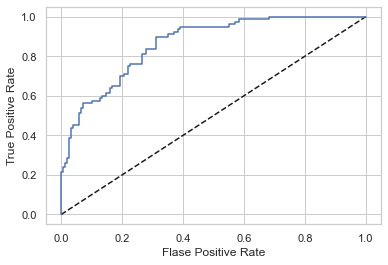

In [42]:
import matplotlib.pyplot as plt

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [43]:
import os

os.getcwd()

'E:\\code\\7.MachineLearningOfficial\\data'

In [44]:
import pickle

filename = "log_reg_traditional_model.pickle"
pickle.dump(log_model, open(filename, "wb"))

In [45]:
loaded_model = pickle.load(open(filename,"rb"))
loaded_model.predict([[6,148,72,35,0,33.6,0.627,50]])

array([1], dtype=int64)

### LogReg Model2 Bank

In [46]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [47]:
import os
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
os.chdir("E:/code/7.MachineLearningOfficial/data")
df=pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [48]:
print(df.columns)
print(df.shape)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')
(41188, 21)


In [49]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [50]:
import numpy as np

np.where(df['education'] =='basic.9y','Basic',df['education'])

array(['basic.4y', 'unknown', 'university.degree', ...,
       'university.degree', 'professional.course', 'high.school'],
      dtype=object)

In [51]:
import numpy as np

df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])

In [52]:
df['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

#### Exploration of data Analysis

In [53]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

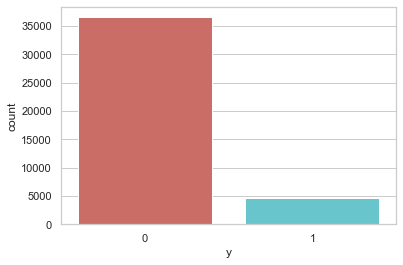

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y',data=df,palette='hls')
plt.show()
#plt.savefig('count_plot')

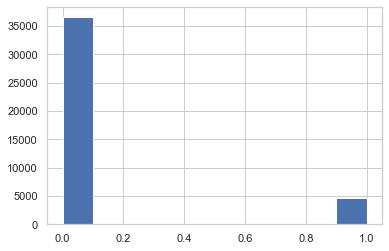

In [55]:
##histogram
plt.hist(x='y',data=df)
plt.show()

In [56]:
count_no_sub = len(df[df['y']==0])
count_sub = len(df[df['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)

pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [57]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [58]:
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [59]:
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [60]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


### visualizations

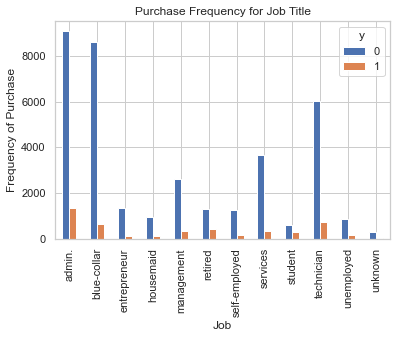

In [61]:
import matplotlib.pyplot as plt

pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

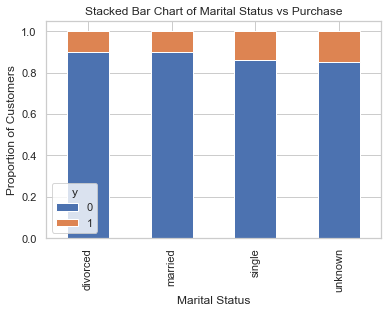

In [62]:
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

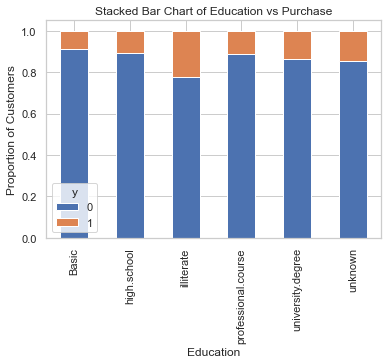

In [63]:
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

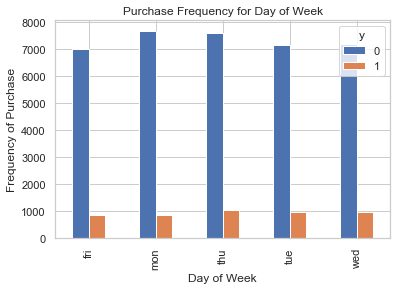

In [64]:
pd.crosstab(df.day_of_week,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

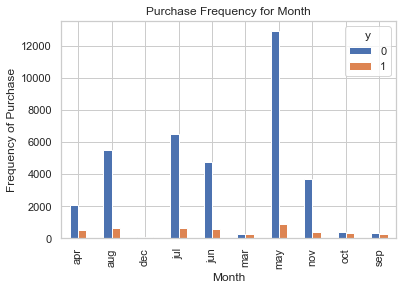

In [65]:
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

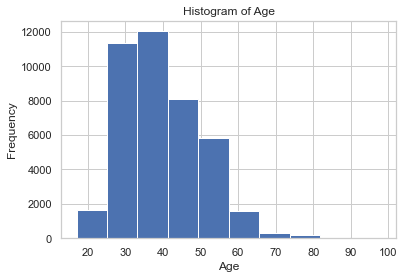

In [66]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

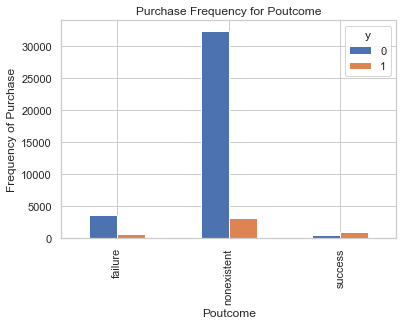

In [67]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')


### Create dummy variables

In [68]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [69]:
data_final=df[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype=object)

### Over-sampling using SMOTE

In [70]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
print(len(X))
print(len(y))
np.unique(y, return_counts=True)

41188
41188


(array([0, 1], dtype=int64), array([36548,  4640], dtype=int64))

In [84]:
!pip install -U imbalanced-learn statsmodels

  Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
  Using cached imbalanced_learn-0.12.2-py3-none-any.whl (257 kB)
  Using cached imbalanced_learn-0.12.1-py3-none-any.whl (257 kB)
  Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
  Using cached imbalanced_learn-0.10.0-py3-none-any.whl (225 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)


In [85]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_to_object_array'

In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smo = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

X_data, y_data = smo.fit_sample(X_train, y_train)

ImportError: cannot import name '_to_object_array'

In [ ]:
os_data_X = pd.DataFrame(data = X_data, columns=columns)
os_data_X.head()

In [ ]:
os_data_y = pd.DataFrame(data = y_data, columns=['y'])
os_data_y.head()

In [63]:
count_no_sub = len(os_data_y[os_data_y['y']==0])
count_sub = len(os_data_y[os_data_y['y']==1])
print(count_no_sub)
print(count_sub)

pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)

pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

NameError: name 'os_data_y' is not defined

### Logistic Regression Model Fitting

In [64]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[128  23]
 [ 31  49]]


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       151
           1       0.68      0.61      0.64        80

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



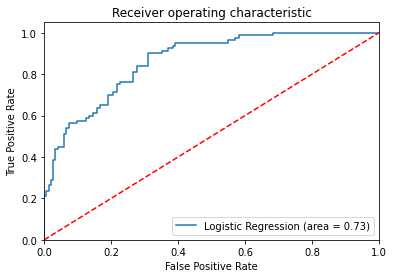

In [68]:
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()